In [1]:
import py_wake
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
from py_wake.site._site import UniformSite

In [3]:
class DummyWT(WindTurbine):
    def __init__(self, ct=0.8, d=80., zh=70., name='dummyWT'):
        WindTurbine.__init__(
            self,
            name=name,
            diameter=d,
            hub_height=zh,
            powerCtFunction=PowerCtTabular(
                ws=[-100,100],
                power=[0,0],
                power_unit="kW",
                ct=[ct,ct]
            )
        )

class DummySite(UniformSite):
    def __init__(self, ws=10, ti=0.04):
        UniformSite.__init__(self, ti=ti, ws=ws)

In [4]:
from py_wake.deficit_models.gaussian import BastankhahGaussianDeficit
from py_wake.wind_farm_models import PropagateDownwind

In [5]:
ks = [0.055, 0.040]
ws = 9.
d  = 80.

In [6]:
zh = 70.
ct = 0.8

In [7]:
from py_wake.flow_map import XZGrid

zd = np.linspace(0.2, 2.0, 201)
site = DummySite(ws=ws)
wt = DummyWT(ct=ct, d=d, zh=zh)

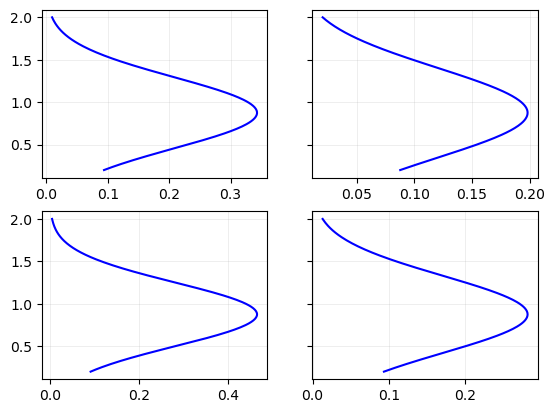

In [8]:
fig, ax = plt.subplots(2, 2, sharey=True)
from py_wake.deficit_models.utils import ct2a_mom1d
xd = [3., 5.]

for i, k in enumerate(ks):
    wfm = PropagateDownwind(
        site=site,
        windTurbines=wt,
        wake_deficitModel=BastankhahGaussianDeficit(
            ct2a=ct2a_mom1d,
            k=k,
            use_effective_ws=True
        )
    )

    sim = wfm(
        x=[0.],
        y=[0.],
        wd=270.,
        ws=ws
    )

    u = np.squeeze(
        sim.flow_map(
            XZGrid(y=0.0, x=np.array(xd)*d, z=zd*d)
        ).WS_eff
    )

    for j in range(len(xd)):
        ax[i,j].plot(
            1.0 - u[:,j]/ws,
            zd,
            'b',
            label='pywake'
        )
        ax[i,j].grid(lw=0.5, alpha=0.3)